In [1]:
from skimage.color import rgb2ycbcr, rgb2lab, rgb2gray
import skimage.transform
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

from scipy.fftpack import dct
from skimage.metrics import peak_signal_noise_ratio as PSNR

def sub2ind(n_row, row, col):
  return n_row * col + row

def dctmtx(N):
  return dct(np.eye(N), norm='ortho', axis=0)

def func(x, mat):
  return mat @ x @ mat.T

def func1(x, mat):
  return np.multiply(mat, x)

def blockproc(im, mat, block_sz, func):
    h, w = im.shape
    m, n = block_sz
    im_out = np.zeros_like(im)
    for x in range(0, h, m):
        for y in range(0, w, n):
            block = im[x:x+m, y:y+n]
            im_out[x:x+m, y:y+n] = func(block, mat)
    return im_out

# 2 Chroma Subsampling

(384, 512, 3)


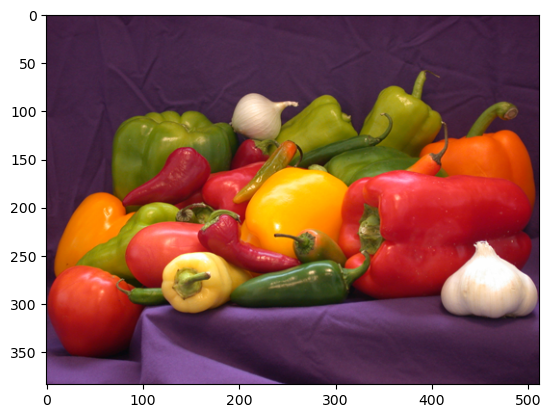

In [2]:
# Q1 + Q2

plt.gray() # makes image plots grayscale
pepper_rgb = imread('peppers.png')
pepper = rgb2ycbcr(imread('peppers.png'))/255

print(pepper.shape)

pepper_y = pepper[:,:,0]
pepper_cb = pepper[:,:,1]
pepper_cr = pepper[:,:,2]

plt.imshow(pepper_rgb)
plt.show()

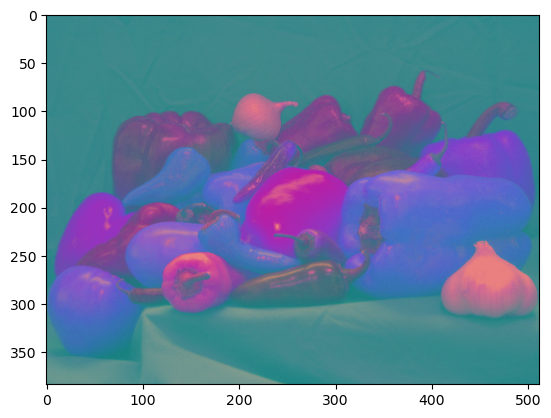

In [3]:
plt.imshow(pepper)
plt.show()

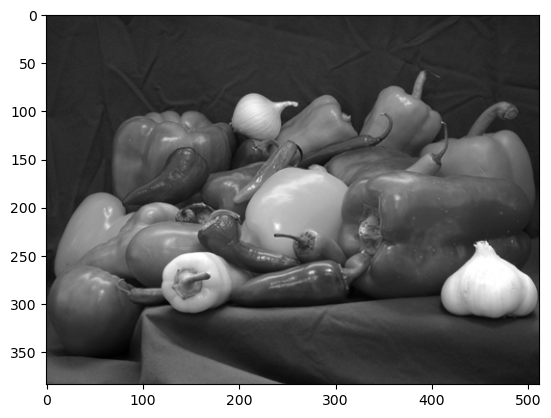

[[0.20708471 0.21204567 0.21797661 ... 0.20641112 0.20265924 0.20366625]
 [0.21127779 0.21003165 0.2099946  ... 0.19866824 0.19526325 0.19401712]
 [0.20856997 0.20930081 0.21166173 ... 0.1997123  0.20044314 0.19540807]
 ...
 [0.37516152 0.37020055 0.38204221 ... 0.16685472 0.1731696  0.16659875]
 [0.36286182 0.36161569 0.37311045 ... 0.15810482 0.16859257 0.16998353]
 [0.36282478 0.37018371 0.36921375 ... 0.1583069  0.16383368 0.17335146]]


In [4]:
plt.imshow(pepper_y)
plt.show()
print(pepper_y)

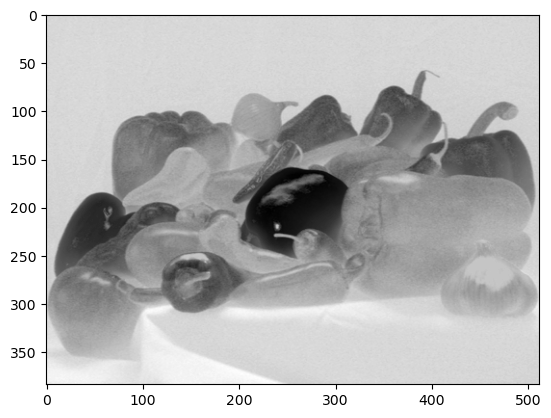

In [5]:
plt.imshow(pepper_cb)
plt.show()

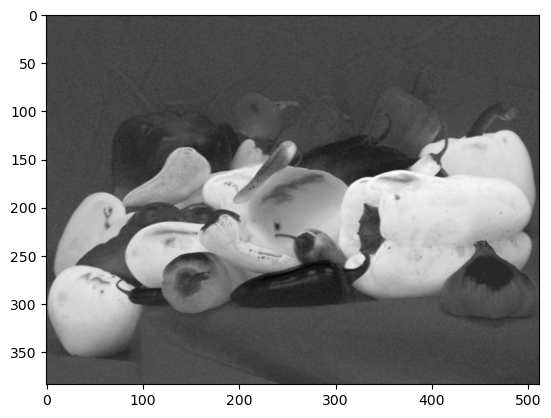

In [6]:
plt.imshow(pepper_cr)
plt.show()

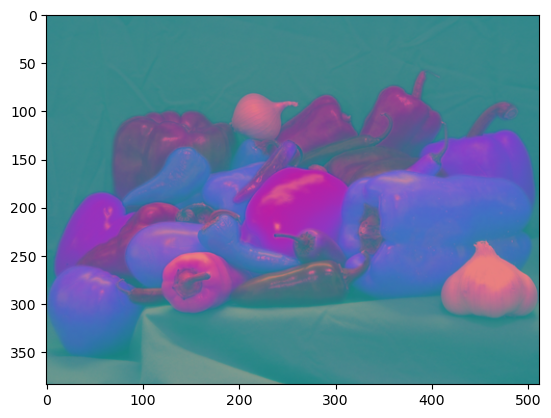

In [7]:
# Q3 + Q4
downsampled_pepper_cb = skimage.transform.rescale(pepper_cb, 0.5)
downsampled_pepper_cr = skimage.transform.rescale(pepper_cr, 0.5)

reupsampled_pepper_cb = skimage.transform.rescale(downsampled_pepper_cb, 2, order=1)  # order=1: bilinear interpolation
reupsampled_pepper_cr = skimage.transform.rescale(downsampled_pepper_cr, 2, order=1)

compressed_cbcr_pepper = pepper.copy()  # copy original struct w/ Y channel
compressed_cbcr_pepper[:,:,1] = reupsampled_pepper_cb  # replace channels with compressed ones
compressed_cbcr_pepper[:,:,2] = reupsampled_pepper_cr

plt.imshow(compressed_cbcr_pepper)
plt.show()

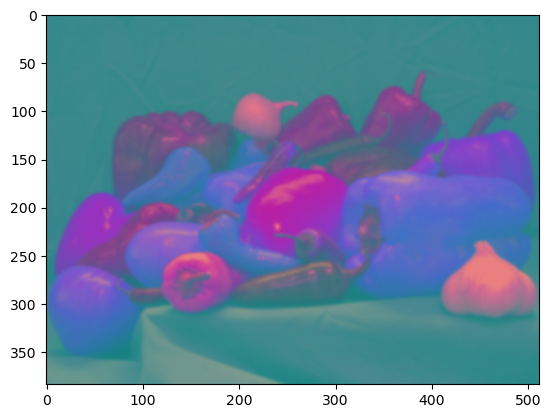

In [8]:
#Q5 Q6 Q7
downsampled_pepper_y = skimage.transform.rescale(pepper_y, 0.5)
reupsampled_pepper_y = skimage.transform.rescale(downsampled_pepper_y, 2, order=1)

compressed_ycbcr_pepper = compressed_cbcr_pepper.copy()  # reuse already img w/ already compressed cbcr channels
compressed_ycbcr_pepper[:,:,0] = reupsampled_pepper_y

plt.imshow(compressed_ycbcr_pepper)
plt.show()

# 3 Colour Segmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-36.183641809551716..100.0].


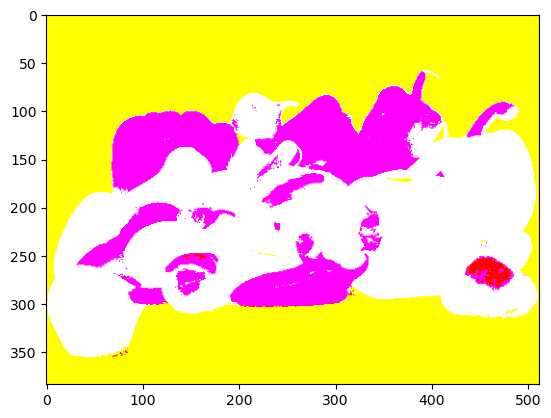

In [9]:
# Q8 Q9
pepper_lab = rgb2lab(pepper_rgb)

plt.imshow(pepper_lab)
plt.show()

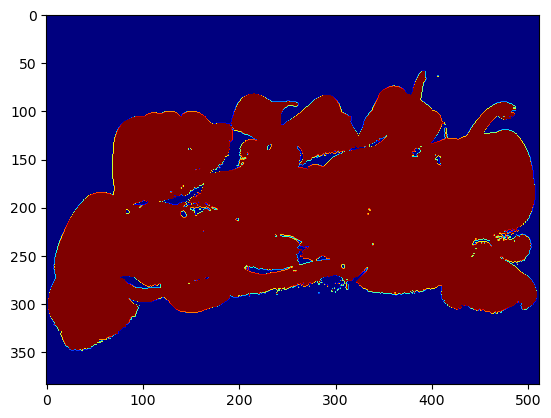

Text(0.5, 1.0, 'Image labeled by cluster index')

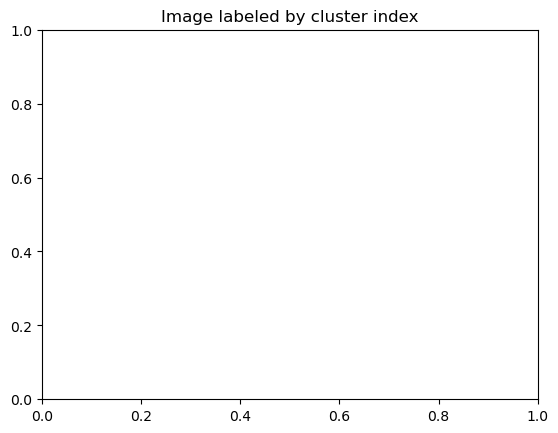

In [10]:
K = 2
row = np.array([55, 200]) - 1
col = np.array([155, 400]) - 1

mu = pepper_lab[row,col]

kmeans = KMeans(n_clusters=K, init=mu, n_init=1)
m, n, ch = pepper_lab.shape
pepper_lab_k2 = np.reshape(pepper_lab, (m * n, ch), order='F')
cluster_idx = kmeans.fit_predict(pepper_lab_k2)

# Label each pixel according to k-means
pixel_labels = np.reshape(cluster_idx, (m, n), order='F')
plt.imshow(pixel_labels, cmap='jet')
plt.show()
plt.title('Image labeled by cluster index')

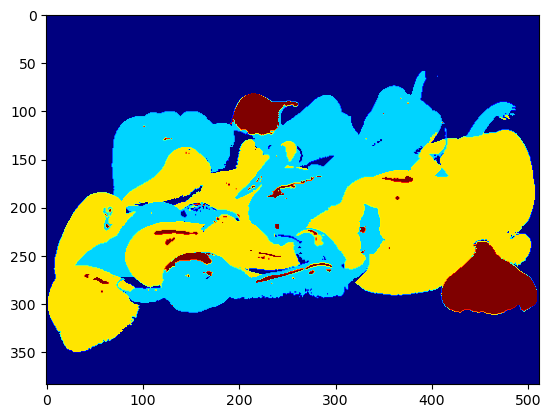

Text(0.5, 1.0, 'Image labeled by cluster index')

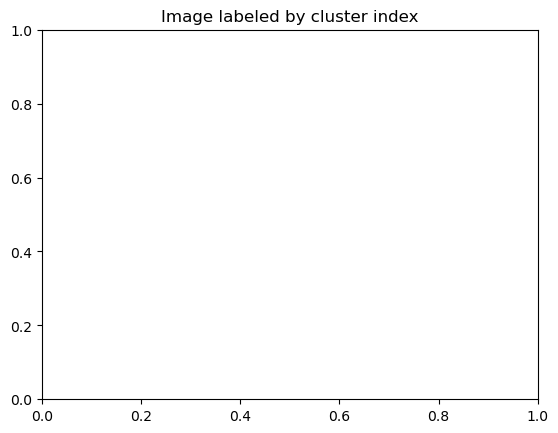

In [11]:
K = 4
row = np.array([55, 130, 200, 280]) - 1
col = np.array([155, 110, 400, 470]) - 1

mu = pepper_lab[row,col]

kmeans = KMeans(n_clusters=K, init=mu, n_init=1)
m, n, ch = pepper_lab.shape
pepper_lab_k3 = np.reshape(pepper_lab, (m * n, ch), order='F')
cluster_idx = kmeans.fit_predict(pepper_lab_k3)

# Label each pixel according to k-means
pixel_labels = np.reshape(cluster_idx, (m, n), order='F')
plt.imshow(pixel_labels, cmap='jet')
plt.show()
plt.title('Image labeled by cluster index')

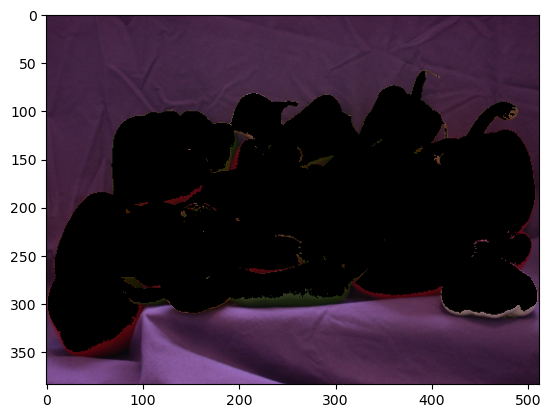

In [12]:
#Q10
filtered_grp0_pepper = pepper_rgb*(np.expand_dims(pixel_labels, axis=-1)==0)
plt.imshow(filtered_grp0_pepper)
plt.show()

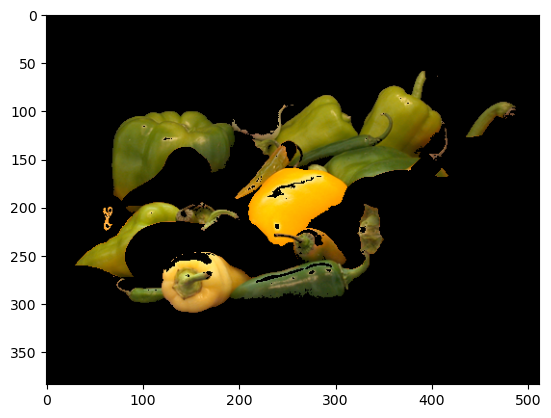

In [13]:
filtered_grp1_pepper = pepper_rgb*(np.expand_dims(pixel_labels, axis=-1)==1)
plt.imshow(filtered_grp1_pepper)
plt.show()

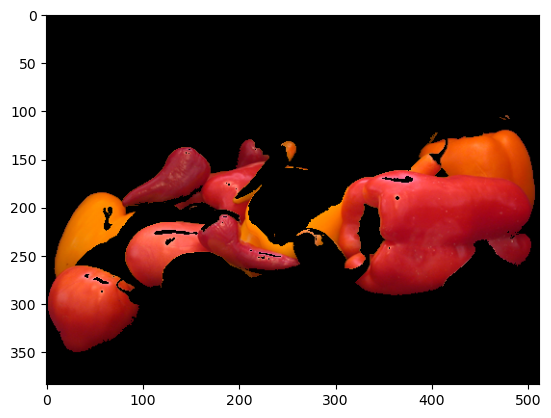

In [14]:
filtered_grp2_pepper = pepper_rgb*(np.expand_dims(pixel_labels, axis=-1)==2)
plt.imshow(filtered_grp2_pepper)
plt.show()

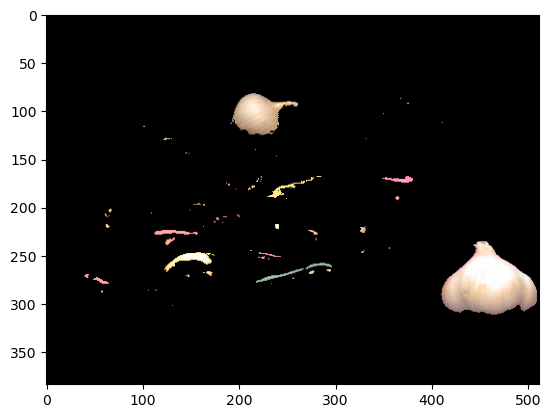

In [15]:
filtered_grp3_pepper = pepper_rgb*(np.expand_dims(pixel_labels, axis=-1)==3)
plt.imshow(filtered_grp3_pepper)
plt.show()

# 4 Image Transform

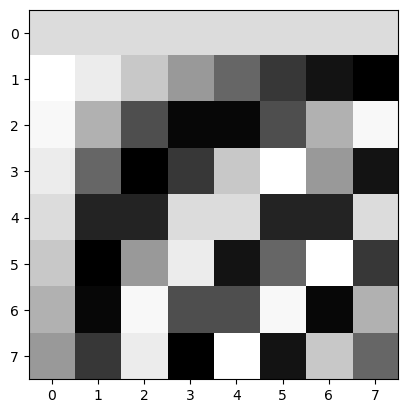

In [16]:
# Q11
dct_trans = dctmtx(8)
plt.imshow(dct_trans)
plt.show()

[[155.0473 155.0473 154.9866 ... 163.5504 147.8955 119.8136]
 [155.0473 155.0473 154.9866 ... 163.5504 147.8955 119.8136]
 [155.0473 155.0473 154.9866 ... 163.5504 147.8955 119.8136]
 ...
 [ 35.0532  35.0532  43.0476 ...  95.0431  90.6768  87.6632]
 [ 37.2735  37.2735  47.763  ...  93.8114  95.096   98.0922]
 [ 37.2735  37.2735  47.763  ...  93.8114  95.096   98.0922]]


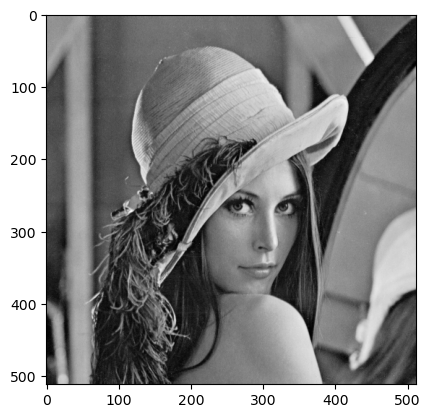

In [17]:
# Q12 Q13
f = rgb2gray(imread('lena.tiff')) * 255
plt.imshow(f)
print(f)
plt.show()

18.4994 246.1861


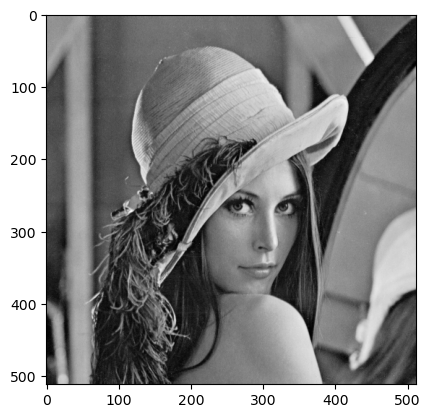

In [18]:
plt.imshow(f)
print(np.min(f), np.max(f))

-807.0 760.0


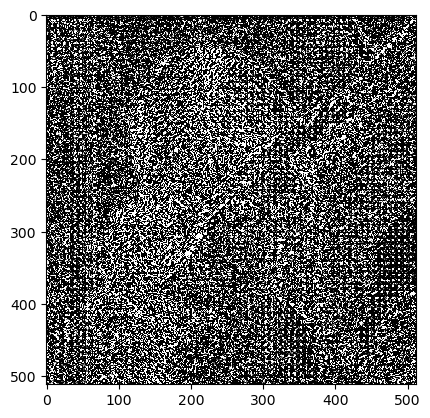

In [19]:
F_trans = np.floor(blockproc(f-128, dct_trans, [8, 8], func))
print(np.min(F_trans),np.max(F_trans))
plt.imshow(F_trans, vmin=0, vmax=1)